<a href="https://colab.research.google.com/github/gmdeorozco/Wisconsin-Breast-Cancer-Binary-Cl-Algorithms/blob/main/Wisconsin_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Classification with Logistic Regression: Breast Cancer Wisconsin Dataset**

The provided code performs binary classification using the logistic regression model on the Breast Cancer Wisconsin dataset. Here's a brief explanation of each part:

1. **Import necessary libraries:** Import the required libraries for data manipulation, model training, and evaluation, including NumPy and Pandas for data handling, scikit-learn's `load_breast_cancer` to access the dataset, and functions for model evaluation such as `accuracy_score`, `confusion_matrix`, and `classification_report`.

2. **Load the Breast Cancer Wisconsin dataset:** Load the Breast Cancer Wisconsin dataset using the `load_breast_cancer()` function from scikit-learn. The features are stored in the variable `X`, and the target labels (binary: 0 for benign, 1 for malignant) are stored in the variable `y`.

3. **Split the dataset into training and testing sets:** Use `train_test_split()` to split the dataset into training and testing sets. The test set contains 20% of the data, and the random state is set to 42 for reproducibility.

4. **Create a logistic regression model for binary classification:** Initialize a logistic regression model using `LogisticRegression()` from scikit-learn.

5. **Train the model on the training data:** Fit the logistic regression model to the training data using `model.fit(X_train, y_train)`.

6. **Make predictions on the test data:** Use the trained model to predict the target labels for the test data. The predicted labels are stored in the variable `y_pred`.

7. **Evaluate the model:** Assess the performance of the logistic regression model using three metrics:
   - Accuracy: Calculate the accuracy of the model's predictions using `accuracy_score(y_test, y_pred)`.
   - Confusion Matrix: Create a confusion matrix to analyze the model's true positive, true negative, false positive, and false negative predictions using `confusion_matrix(y_test, y_pred)`.
   - Classification Report: Generate a detailed classification report that includes precision, recall, F1-score, and support for both classes using `classification_report(y_test, y_pred)`.

8. **Print the results:** Display the results of the model evaluation, including the accuracy, confusion matrix, and classification report.

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model for binary classification
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.9649122807017544
Confusion Matrix:
[[40  3]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


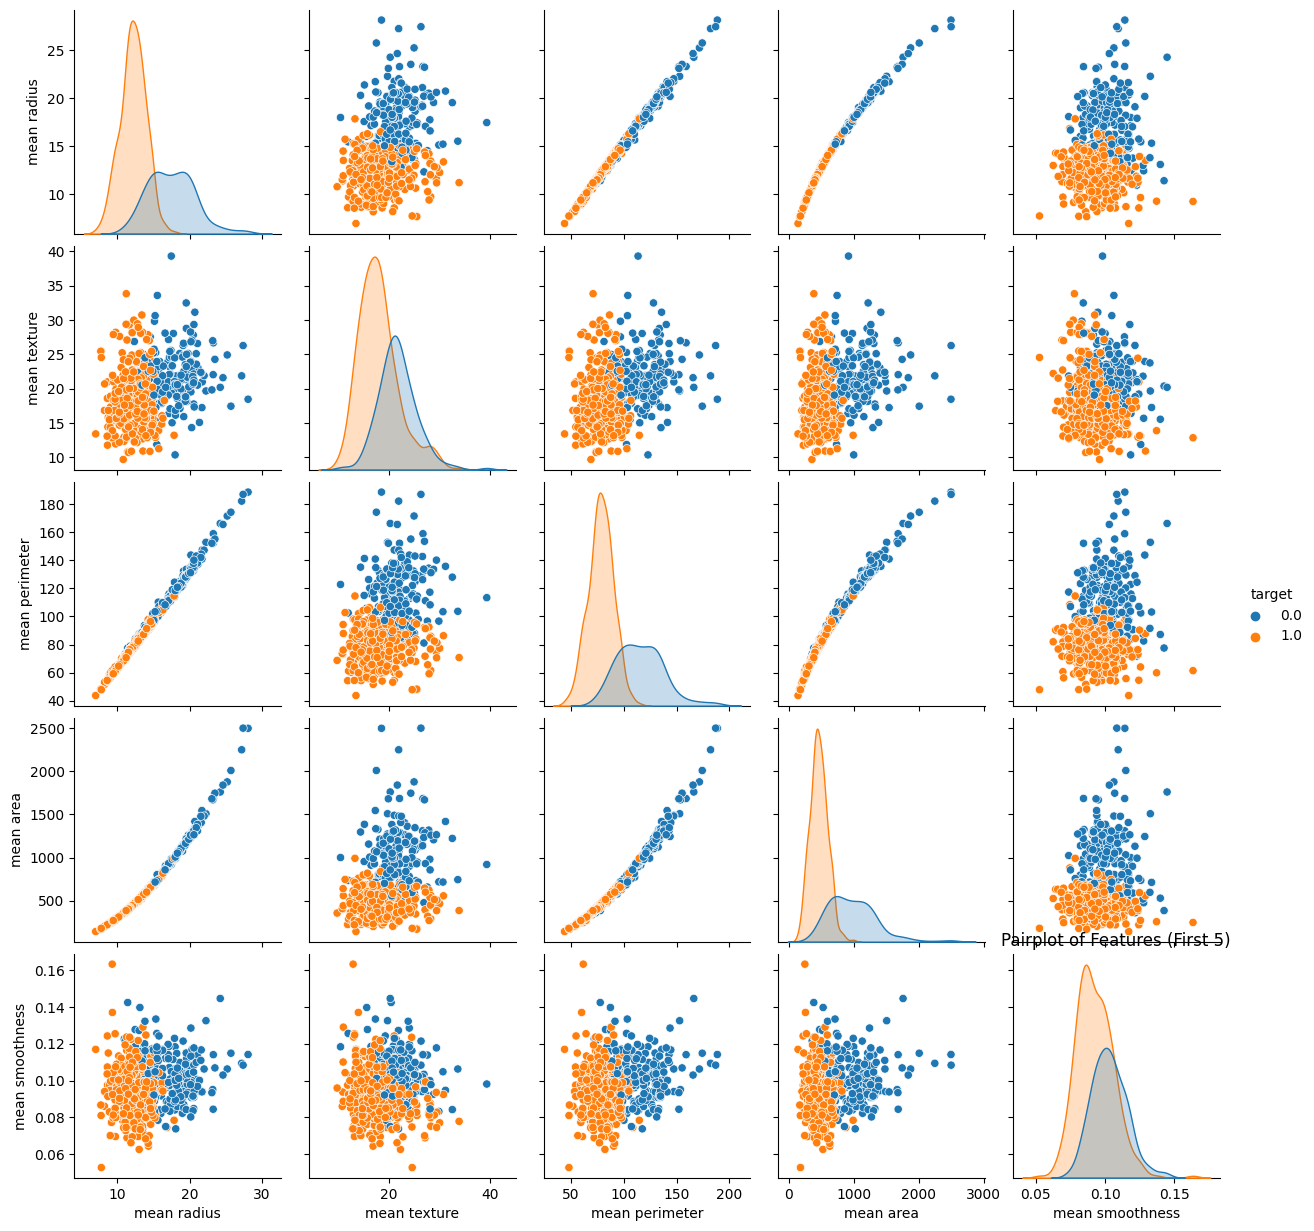

In [9]:
# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data=np.c_[X, y], columns=np.append(data.feature_names, ['target']))

# Exploratory Data Analysis (EDA)
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='target', vars=data.feature_names[:5])
plt.title("Pairplot of Features (First 5)")
plt.show()



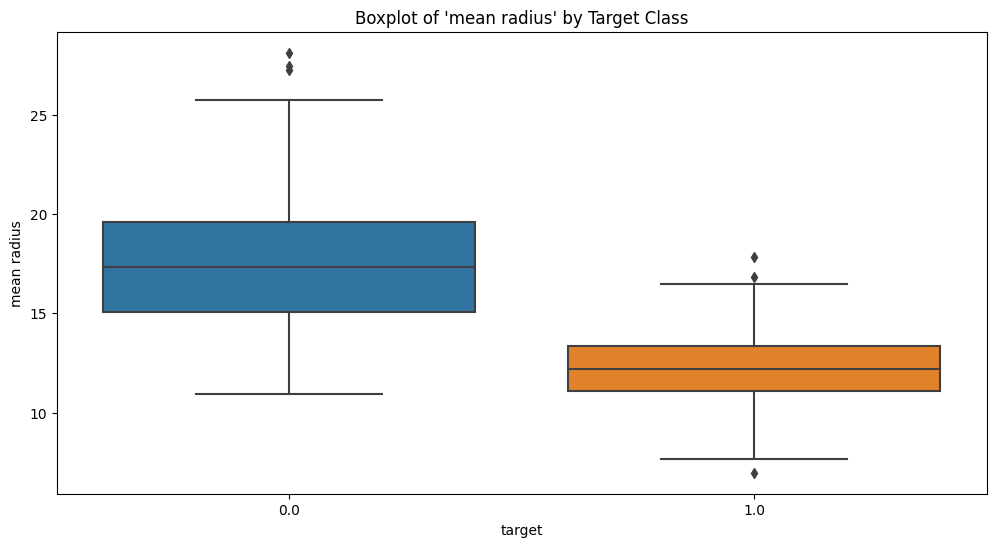

In [10]:
# Boxplot to compare features by target class
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='mean radius', data=df)
plt.title("Boxplot of 'mean radius' by Target Class")
plt.show()



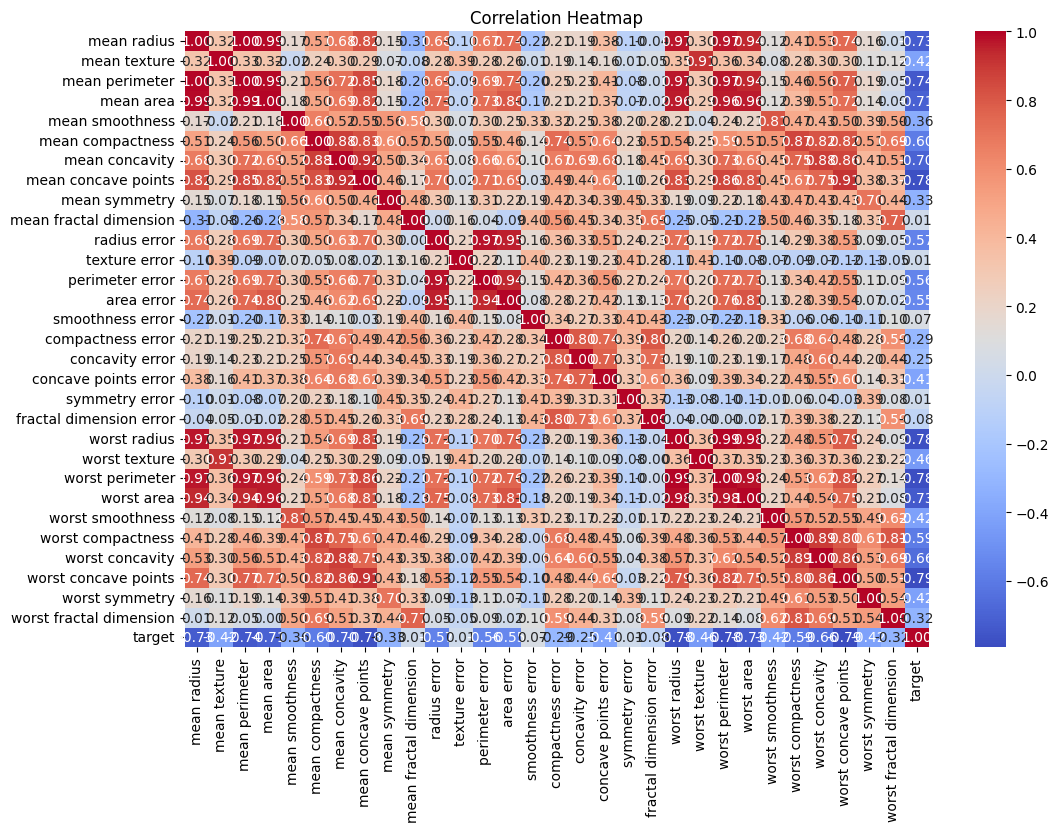

In [11]:
# Correlation heatmap to identify feature relationships
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Pairplot: We use sns.pairplot() from Seaborn to visualize pairwise relationships between the first five features (mean radius, mean texture, mean perimeter, mean area, and mean smoothness) by color-coding the target classes (malignant and benign). This helps identify patterns and potential separability between the classes.

Boxplot: We use sns.boxplot() from Seaborn to compare the 'mean radius' feature distribution for both target classes. This boxplot provides insights into how the 'mean radius' feature differs between malignant and benign tumors.

Correlation Heatmap: We use sns.heatmap() from Seaborn to create a heatmap showing the correlation between all features. This helps identify which features are highly correlated with each other, which can be essential for feature selection and model building.